In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

# Ego4D Data

In [2]:
EGO4D_DATA_PATH = os.path.join("..", "ego4d_data", "v2")

## NLQ Annotations

In [3]:
nlq_annotations = dict()

NLQ_ANNOTATIONS_PATH = os.path.join(EGO4D_DATA_PATH, "annotations")

for file_name in os.listdir(NLQ_ANNOTATIONS_PATH):
    if file_name.startswith("nlq"):
        print("File name:", file_name)
        split = "train" if "train" in file_name else "test" if "test" in file_name else "val"
        
        file_path = os.path.join(NLQ_ANNOTATIONS_PATH, file_name)
        
        with open(file_path, "r") as f:
            raw_data = json.load(f)
        
        nlq_annotations[split] = raw_data

print("Annotations split:", nlq_annotations.keys())

File name: nlq_test_unannotated.json
File name: nlq_train.json
File name: nlq_val.json
Annotations split: dict_keys(['test', 'train', 'val'])


### Data Structure Exploration

#### Train


Train annotations are characterized by:
- version: which in this case is v2 as we have chosen 
- date: date of the data last revision (I guess)
- description: refers to the data benchmark (NLQ) and split (train)
- manifest: path to the split manifest

In [4]:
nlq_annotations_train = nlq_annotations["train"]
print("nlq_annotations_train.keys()", nlq_annotations_train.keys())

nlq_annotations_train.keys() dict_keys(['version', 'date', 'description', 'metadata', 'videos'])


In [5]:
print("nlq_annotations_train['version']", nlq_annotations_train["version"])
print("nlq_annotations_train['date']", nlq_annotations_train["date"])
print("nlq_annotations_train['description']", nlq_annotations_train["description"])
print("nlq_annotations_train['metadata']", nlq_annotations_train["metadata"])

nlq_annotations_train['version'] 2.0
nlq_annotations_train['date'] 230106
nlq_annotations_train['description'] NLQ Annotations (train)
nlq_annotations_train['metadata'] s3://ego4d-consortium-sharing/public/v2/ego4d.json


Each item of the videos list contains informations about a specific video
- video uid: unique identifier of the videos
- clips: 
- split: train as we are working with the train annotations

In [6]:
# explore videos data
nlq_annotations_train_videos = nlq_annotations_train["videos"]

print(f"type(nlq_annotations_train_videos): {type(nlq_annotations_train_videos)}")
print(f"len(nlq_annotations_train_videos): {len(nlq_annotations_train_videos)}")

type(nlq_annotations_train_videos): <class 'list'>
len(nlq_annotations_train_videos): 933


In [7]:
# video data structure
video_0 = nlq_annotations_train_videos[0]
print(f"type(video_0): {type(video_0)}")
print(f"video_0.keys(): {video_0.keys()}")

type(video_0): <class 'dict'>
video_0.keys(): dict_keys(['video_uid', 'clips', 'split'])


In [8]:
# videop unique identifier
video_0_uid = video_0["video_uid"]
print(video_0_uid)

216e3f0e-ccb9-4d54-ba56-d275fedbf52f


In [9]:
# video split group
video_0_split = video_0["split"]
print(video_0_split)

train


Question:
- By how many clips is every video characterized by?

In [10]:
video_0_clips = video_0["clips"]
print("type(video_0_clips)", type(video_0_clips))
print("len(video_0_clips)", len(video_0_clips))

type(video_0_clips) <class 'list'>
len(video_0_clips) 1


In [11]:
video_0_clips_0 = video_0_clips[0]
print("type(video_0_clips_0)", type(video_0_clips_0))
print("video_0_clips_0.keys()", video_0_clips_0.keys())

type(video_0_clips_0) <class 'dict'>
video_0_clips_0.keys() dict_keys(['clip_uid', 'video_start_sec', 'video_end_sec', 'video_start_frame', 'video_end_frame', 'clip_start_sec', 'clip_end_sec', 'clip_start_frame', 'clip_end_frame', 'source_clip_uid', 'annotations'])


In [12]:
print("video_0_clips_0['clip_uid']", video_0_clips_0["clip_uid"])
print("video_0_clips_0['source_clip_uid']", video_0_clips_0["source_clip_uid"])

video_0_clips_0['clip_uid'] f06d1935-550f-4caa-909c-b2db4c28f599
video_0_clips_0['source_clip_uid'] 2cdc7965-9007-48d3-b6d1-d589179f1670


Exploration of video/clips timesteps and frame indices.

Interesting fact, there is a delay in the start of the **video**, which is not present in the clip itself.

**Question:**
- What is this the origin of this delay?

In [13]:
print(">> Video timesteps:")
print(f"  >> video_0_clips_0['video_start_sec']: {video_0_clips_0["video_start_sec"]}")
print(f"  >> video_0_clips_0['video_end_sec']: {video_0_clips_0["video_end_sec"]}\n")

print(">> Clip timesteps:")
print(f"  >> video_0_clips_0['clip_start_sec']: {video_0_clips_0["clip_start_sec"]}")
print(f"  >> video_0_clips_0['clip_end_sec']: {video_0_clips_0["clip_end_sec"]}")

>> Video timesteps:
  >> video_0_clips_0['video_start_sec']: 0.0210286
  >> video_0_clips_0['video_end_sec']: 480.0210286

>> Clip timesteps:
  >> video_0_clips_0['clip_start_sec']: 0
  >> video_0_clips_0['clip_end_sec']: 480.0


In [14]:
print(">> Video frames:")
print(f"  >> video_0_clips_0['video_start_frame']: {video_0_clips_0["video_start_frame"]}")
print(f"  >> video_0_clips_0['video_end_frame']: {video_0_clips_0["video_end_frame"]}\n")

print(">> Clip frames:")
print(f"  >> video_0_clips_0['clip_start_frame']: {video_0_clips_0["clip_start_frame"]}")
print(f"  >> video_0_clips_0['clip_end_frame']: {video_0_clips_0["clip_end_frame"]}")

>> Video frames:
  >> video_0_clips_0['video_start_frame']: 0
  >> video_0_clips_0['video_end_frame']: 14400

>> Clip frames:
  >> video_0_clips_0['clip_start_frame']: 0
  >> video_0_clips_0['clip_end_frame']: 14400


Clips annotations exploration

**Question:**
- How many annotations per clip?

In [15]:
video_0_clips_0_annotations = video_0_clips_0["annotations"]
print("type(video_0_clips_0_annotations)", type(video_0_clips_0_annotations))
print("len(video_0_clips_0_annotations)", len(video_0_clips_0_annotations))

type(video_0_clips_0_annotations) <class 'list'>
len(video_0_clips_0_annotations) 2


In [16]:
video_0_clips_0_annotations_0 = video_0_clips_0_annotations[0]
print("type(video_0_clips_0_annotations_0)", type(video_0_clips_0_annotations_0))
print("video_0_clips_0_annotations_0.keys()", video_0_clips_0_annotations_0.keys())

type(video_0_clips_0_annotations_0) <class 'dict'>
video_0_clips_0_annotations_0.keys() dict_keys(['language_queries', 'annotation_uid'])


In [17]:
video_0_clips_0_annotations_0_language_queries = video_0_clips_0_annotations_0["language_queries"]
print("type(video_0_clips_0_annotations_0_language_queries)", type(video_0_clips_0_annotations_0_language_queries))
print("len(video_0_clips_0_annotations_0_language_queries)", len(video_0_clips_0_annotations_0_language_queries))

type(video_0_clips_0_annotations_0_language_queries) <class 'list'>
len(video_0_clips_0_annotations_0_language_queries) 7


In [18]:
video_0_clips_0_annotations_0_language_queries_0 = video_0_clips_0_annotations_0_language_queries[0]
video_0_clips_0_annotations_0_language_queries_0

{'clip_start_sec': 17.25669,
 'clip_end_sec': 27.256,
 'video_start_sec': 17.2777186,
 'video_end_sec': 27.2770286,
 'video_start_frame': 518,
 'video_end_frame': 818,
 'template': 'Objects: What did I put in X?',
 'query': 'what did I pick from the fridge?',
 'slot_x': 'fridge',
 'verb_x': 'pick',
 'raw_tags': ['Objects: What did I put in X?',
  'what did I pick from the fridge?',
  'fridge',
  'pick']}

#### Validation

In [19]:
nlq_annotations_val = nlq_annotations["val"]
print("nlq_annotations_val.keys()", nlq_annotations_val.keys())

nlq_annotations_val.keys() dict_keys(['version', 'date', 'description', 'metadata', 'videos'])


In [20]:
print("nlq_annotations_val['version']", nlq_annotations_val["version"])
print("nlq_annotations_val['date']", nlq_annotations_val["date"])
print("nlq_annotations_val['description']", nlq_annotations_val["description"])
print("nlq_annotations_val['metadata']", nlq_annotations_val["metadata"])

nlq_annotations_val['version'] 2.0
nlq_annotations_val['date'] 230105
nlq_annotations_val['description'] NLQ Annotations (val)
nlq_annotations_val['metadata'] s3://ego4d-consortium-sharing/public/v2/ego4d.json


In [21]:
# explore videos data
nlq_annotations_val_videos = nlq_annotations_val["videos"]

print(f"type(nlq_annotations_train_videos): {type(nlq_annotations_val_videos)}")
print(f"len(nlq_annotations_train_videos): {len(nlq_annotations_val_videos)}")

type(nlq_annotations_train_videos): <class 'list'>
len(nlq_annotations_train_videos): 303


In [22]:
# video data structure
video_0 = nlq_annotations_val_videos[0]
print(f"type(video_0): {type(video_0)}")
print(f"video_0.keys(): {video_0.keys()}")

type(video_0): <class 'dict'>
video_0.keys(): dict_keys(['video_uid', 'clips', 'split'])


In [23]:
# videop unique identifier
video_0_uid = video_0["video_uid"]
print(video_0_uid)

72295d26-19f7-4c6a-874e-85ba8654861e


In [24]:
# video split group
video_0_split = video_0["split"]
print(video_0_split)

val


In [25]:
video_0_clips = video_0["clips"]
print("type(video_0_clips)", type(video_0_clips))
print("len(video_0_clips)", len(video_0_clips))

type(video_0_clips) <class 'list'>
len(video_0_clips) 1


In [26]:
video_0_clips_0 = video_0_clips[0]
print("type(video_0_clips_0)", type(video_0_clips_0))
print("video_0_clips_0.keys()", video_0_clips_0.keys())

type(video_0_clips_0) <class 'dict'>
video_0_clips_0.keys() dict_keys(['clip_uid', 'video_start_sec', 'video_end_sec', 'video_start_frame', 'video_end_frame', 'clip_start_sec', 'clip_end_sec', 'clip_start_frame', 'clip_end_frame', 'source_clip_uid', 'annotations'])


In [27]:
print("video_0_clips_0['clip_uid']", video_0_clips_0["clip_uid"])
print("video_0_clips_0['source_clip_uid']", video_0_clips_0["source_clip_uid"])

video_0_clips_0['clip_uid'] cc2d7790-67f7-4e52-9fa9-33121c9431a2
video_0_clips_0['source_clip_uid'] 806bae1d-3cf4-45b4-b7c1-4230a2929398


In [28]:
print(">> Video timesteps:")
print(f"  >> video_0_clips_0['video_start_sec']: {video_0_clips_0["video_start_sec"]}")
print(f"  >> video_0_clips_0['video_end_sec']: {video_0_clips_0["video_end_sec"]}\n")

print(">> Clip timesteps:")
print(f"  >> video_0_clips_0['clip_start_sec']: {video_0_clips_0["clip_start_sec"]}")
print(f"  >> video_0_clips_0['clip_end_sec']: {video_0_clips_0["clip_end_sec"]}")

>> Video timesteps:
  >> video_0_clips_0['video_start_sec']: -3.999999999976245e-07
  >> video_0_clips_0['video_end_sec']: 480.0366735908854

>> Clip timesteps:
  >> video_0_clips_0['clip_start_sec']: 0
  >> video_0_clips_0['clip_end_sec']: 480.0156449908854


In [29]:
print(">> Video frames:")
print(f"  >> video_0_clips_0['video_start_frame']: {video_0_clips_0["video_start_frame"]}")
print(f"  >> video_0_clips_0['video_end_frame']: {video_0_clips_0["video_end_frame"]}\n")

print(">> Clip frames:")
print(f"  >> video_0_clips_0['clip_start_frame']: {video_0_clips_0["clip_start_frame"]}")
print(f"  >> video_0_clips_0['clip_end_frame']: {video_0_clips_0["clip_end_frame"]}")

>> Video frames:
  >> video_0_clips_0['video_start_frame']: 0
  >> video_0_clips_0['video_end_frame']: 14400

>> Clip frames:
  >> video_0_clips_0['clip_start_frame']: 0
  >> video_0_clips_0['clip_end_frame']: 14400


In [30]:
video_0_clips_0_annotations = video_0_clips_0["annotations"]
print("type(video_0_clips_0_annotations)", type(video_0_clips_0_annotations))
print("len(video_0_clips_0_annotations)", len(video_0_clips_0_annotations))

type(video_0_clips_0_annotations) <class 'list'>
len(video_0_clips_0_annotations) 2


In [31]:
video_0_clips_0_annotations_0 = video_0_clips_0_annotations[0]
print("type(video_0_clips_0_annotations_0)", type(video_0_clips_0_annotations_0))
print("video_0_clips_0_annotations_0.keys()", video_0_clips_0_annotations_0.keys())

type(video_0_clips_0_annotations_0) <class 'dict'>
video_0_clips_0_annotations_0.keys() dict_keys(['language_queries', 'annotation_uid', 'request_uid'])


In [32]:
video_0_clips_0_annotations_0_language_queries = video_0_clips_0_annotations_0["language_queries"]
print("type(video_0_clips_0_annotations_0_language_queries)", type(video_0_clips_0_annotations_0_language_queries))
print("len(video_0_clips_0_annotations_0_language_queries)", len(video_0_clips_0_annotations_0_language_queries))

type(video_0_clips_0_annotations_0_language_queries) <class 'list'>
len(video_0_clips_0_annotations_0_language_queries) 10


In [33]:
video_0_clips_0_annotations_0_language_queries_0 = video_0_clips_0_annotations_0_language_queries[0]
video_0_clips_0_annotations_0_language_queries_0

{'clip_start_sec': 28.60389,
 'clip_end_sec': 29.013,
 'video_start_sec': 28.603889600000002,
 'video_end_sec': 29.012999600000004,
 'video_start_frame': 857,
 'video_end_frame': 870,
 'template': 'Place: Where did I put X?',
 'query': 'Where did i put the fire gun ?',
 'slot_x': 'fire gun ',
 'verb_x': 'put',
 'raw_tags': ['Place: Where did I put X?',
  'Where did i put the fire gun ?',
  'fire gun ',
  'put']}

#### Test

In [34]:
nlq_annotations_test = nlq_annotations["test"]
print("nlq_annotations_test.keys()", nlq_annotations_test.keys())

nlq_annotations_test.keys() dict_keys(['version', 'date', 'description', 'manifest', 'videos'])


In [35]:
print("nlq_annotations_test['version']", nlq_annotations_test["version"])
print("nlq_annotations_test['date']", nlq_annotations_test["date"])
print("nlq_annotations_test['description']", nlq_annotations_test["description"])
print("nlq_annotations_test['manifest']", nlq_annotations_test["manifest"])

nlq_annotations_test['version'] 1
nlq_annotations_test['date'] 220216
nlq_annotations_test['description'] NLQ Annotations (test unannotated)
nlq_annotations_test['manifest'] s3://ego4d-consortium-sharing/public/v1/full_scale/manifest.csv


In [36]:
# explore videos data
nlq_annotations_test_videos = nlq_annotations_test["videos"]

print(f"type(nlq_annotations_test_videos): {type(nlq_annotations_test_videos)}")
print(f"len(nlq_annotations_test_videos): {len(nlq_annotations_test_videos)}")

type(nlq_annotations_test_videos): <class 'list'>
len(nlq_annotations_test_videos): 258


In [37]:
# video data structure
video_0 = nlq_annotations_test_videos[0]
print(f"type(video_0): {type(video_0)}")
print(f"video_0.keys(): {video_0.keys()}")

type(video_0): <class 'dict'>
video_0.keys(): dict_keys(['video_uid', 'clips', 'split'])


In [38]:
# videop unique identifier
video_0_uid = video_0["video_uid"]
print(video_0_uid)

c9c44dea-c37b-461d-aa14-20e934126df5


In [39]:
# video split group
video_0_split = video_0["split"]
print(video_0_split)

test


In [40]:
video_0_clips = video_0["clips"]
print("type(video_0_clips)", type(video_0_clips))
print("len(video_0_clips)", len(video_0_clips))

type(video_0_clips) <class 'list'>
len(video_0_clips) 3


In [41]:
video_0_clips_0 = video_0_clips[0]
print("type(video_0_clips_0)", type(video_0_clips_0))
print("video_0_clips_0.keys()", video_0_clips_0.keys())

type(video_0_clips_0) <class 'dict'>
video_0_clips_0.keys() dict_keys(['clip_uid', 'video_start_sec', 'video_end_sec', 'video_start_frame', 'video_end_frame', 'clip_start_sec', 'clip_end_sec', 'clip_start_frame', 'clip_end_frame', 'source_clip_uid', 'annotations'])


In [42]:
print("video_0_clips_0['clip_uid']", video_0_clips_0["clip_uid"])
print("video_0_clips_0['source_clip_uid']", video_0_clips_0["source_clip_uid"])

video_0_clips_0['clip_uid'] a603669a-57f9-4db4-8a81-0a6720946d45
video_0_clips_0['source_clip_uid'] 4ee7dc88-3d7f-4607-a110-9419fb0eb93d


In [43]:
print(">> Video timesteps:")
print(f"  >> video_0_clips_0['video_start_sec']: {video_0_clips_0["video_start_sec"]}")
print(f"  >> video_0_clips_0['video_end_sec']: {video_0_clips_0["video_end_sec"]}\n")

print(">> Clip timesteps:")
print(f"  >> video_0_clips_0['clip_start_sec']: {video_0_clips_0["clip_start_sec"]}")
print(f"  >> video_0_clips_0['clip_end_sec']: {video_0_clips_0["clip_end_sec"]}")

>> Video timesteps:
  >> video_0_clips_0['video_start_sec']: 1489.0943619333332
  >> video_0_clips_0['video_end_sec']: 1969.1310359242186

>> Clip timesteps:
  >> video_0_clips_0['clip_start_sec']: 0
  >> video_0_clips_0['clip_end_sec']: 480.03667399088545


In [44]:
print(">> Video frames:")
print(f"  >> video_0_clips_0['video_start_frame']: {video_0_clips_0["video_start_frame"]}")
print(f"  >> video_0_clips_0['video_end_frame']: {video_0_clips_0["video_end_frame"]}\n")

print(">> Clip frames:")
print(f"  >> video_0_clips_0['clip_start_frame']: {video_0_clips_0["clip_start_frame"]}")
print(f"  >> video_0_clips_0['clip_end_frame']: {video_0_clips_0["clip_end_frame"]}")

>> Video frames:
  >> video_0_clips_0['video_start_frame']: 66429
  >> video_0_clips_0['video_end_frame']: 66429

>> Clip frames:
  >> video_0_clips_0['clip_start_frame']: 0
  >> video_0_clips_0['clip_end_frame']: 14401


In [45]:
video_0_clips_0_annotations = video_0_clips_0["annotations"]
print("type(video_0_clips_0_annotations)", type(video_0_clips_0_annotations))
print("len(video_0_clips_0_annotations)", len(video_0_clips_0_annotations))

type(video_0_clips_0_annotations) <class 'list'>
len(video_0_clips_0_annotations) 2


In [46]:
video_0_clips_0_annotations_0 = video_0_clips_0_annotations[0]
print("type(video_0_clips_0_annotations_0)", type(video_0_clips_0_annotations_0))
print("video_0_clips_0_annotations_0.keys()", video_0_clips_0_annotations_0.keys())

type(video_0_clips_0_annotations_0) <class 'dict'>
video_0_clips_0_annotations_0.keys() dict_keys(['language_queries', 'annotation_uid'])


In [47]:
video_0_clips_0_annotations_0_language_queries = video_0_clips_0_annotations_0["language_queries"]
print("type(video_0_clips_0_annotations_0_language_queries)", type(video_0_clips_0_annotations_0_language_queries))
print("len(video_0_clips_0_annotations_0_language_queries)", len(video_0_clips_0_annotations_0_language_queries))

type(video_0_clips_0_annotations_0_language_queries) <class 'list'>
len(video_0_clips_0_annotations_0_language_queries) 5


In [48]:
video_0_clips_0_annotations_0_language_queries_0 = video_0_clips_0_annotations_0_language_queries[0]
video_0_clips_0_annotations_0_language_queries_0

{'query': 'What did in put in the sack?'}

### Exploratory Data Analysis

#### Distribution of videos across dataset splits

In [49]:
nlq_annotations_train = nlq_annotations["train"]
nlq_annotations_val = nlq_annotations["val"]
nlq_annotations_test = nlq_annotations["test"]

In [50]:
n_videos_train = len(nlq_annotations_train["videos"])
n_videos_val = len(nlq_annotations_val["videos"])
n_videos_test = len(nlq_annotations_test["videos"])

tot_n_videos = n_videos_train + n_videos_val + n_videos_test

print(f"Number of Videos per Split (Total: {tot_n_videos}):")
print(f"  - Train:      {n_videos_train}")
print(f"  - Validation: {n_videos_val}")
print(f"  - Test:       {n_videos_test}")

Number of Videos per Split (Total: 1494):
  - Train:      933
  - Validation: 303
  - Test:       258


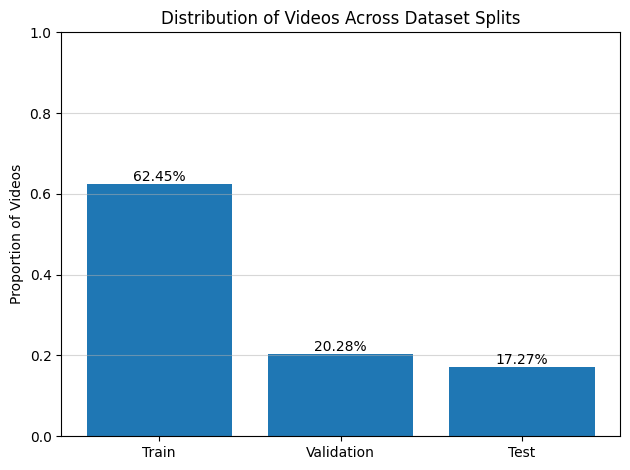

In [51]:
splits = np.array(["Train", "Validation", "Test"])
percentages = np.array([n_videos_train, n_videos_val, n_videos_test]) / tot_n_videos

plt.bar(x=splits, height=percentages)

for i, perc in enumerate(percentages):
    plt.text(x=i, y=perc, s=f"{perc*100:.2f}%", ha="center", va="bottom")

plt.ylim((0, 1))
plt.title("Distribution of Videos Across Dataset Splits")
plt.ylabel("Proportion of Videos")
plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()

#### Distribution of clips across dataset splits

In [52]:
def get_clips_count(annotation_split):
    n_clips = 0
    for video in annotation_split["videos"]:
        clips = len(video["clips"])
        n_clips += clips
    return n_clips

In [53]:
n_clips_train = get_clips_count(nlq_annotations_train)
n_clips_val = get_clips_count(nlq_annotations_val)
n_clips_test = get_clips_count(nlq_annotations_test)
tot_n_clips = n_clips_train + n_clips_val + n_clips_test

print(f"Number of Clips per Split (Total: {tot_n_clips}):")
print(f"  - Train:      {n_clips_train}")
print(f"  - Validation: {n_clips_val}")
print(f"  - Test:       {n_clips_test}")

Number of Clips per Split (Total: 2019):
  - Train:      1271
  - Validation: 415
  - Test:       333


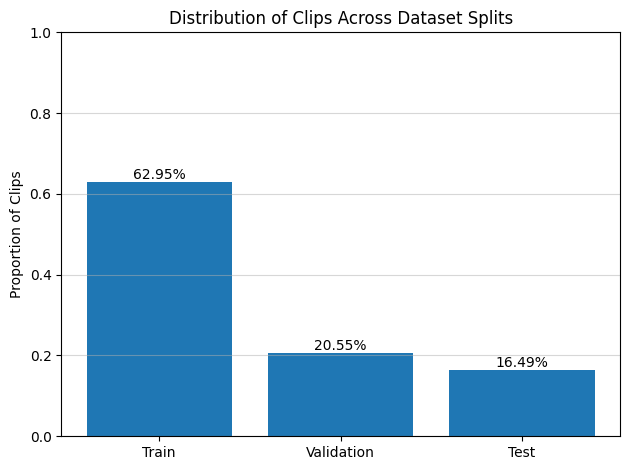

In [54]:
percentages = np.array([n_clips_train, n_clips_val, n_clips_test]) / tot_n_clips

plt.bar(x=splits, height=percentages)

for i, perc in enumerate(percentages):
    plt.text(x=i, y=perc, s=f"{perc*100:.2f}%", ha="center", va="bottom")

plt.ylim((0, 1))
plt.title("Distribution of Clips Across Dataset Splits")
plt.ylabel("Proportion of Clips")
plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()

#### Distribution of clips for individual videos

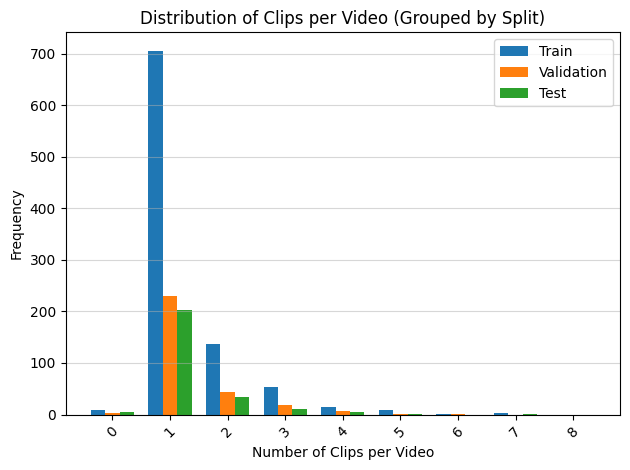

In [55]:
n_clips_video_train = np.array([len(video["clips"]) for video in nlq_annotations_train["videos"]])
n_clips_video_val = np.array([len(video["clips"]) for video in nlq_annotations_val["videos"]])
n_clips_video_test = np.array([len(video["clips"]) for video in nlq_annotations_test["videos"]])


all_clips = np.concatenate([n_clips_video_train, n_clips_video_val, n_clips_video_test])
bins = np.arange(min(all_clips), max(all_clips) + 3)  

train_hist, _ = np.histogram(n_clips_video_train, bins=bins)
val_hist, _ = np.histogram(n_clips_video_val, bins=bins)
test_hist, _ = np.histogram(n_clips_video_test, bins=bins)

bar_width = 0.25
x = bins[:-1]  
x_indices = np.arange(len(x))  

plt.bar(x_indices - bar_width, train_hist, width=bar_width, label='Train')
plt.bar(x_indices, val_hist, width=bar_width, label='Validation')
plt.bar(x_indices + bar_width, test_hist, width=bar_width, label='Test')

plt.xticks(x_indices, x, rotation=45)
plt.xlabel("Number of Clips per Video")
plt.ylabel("Frequency")
plt.title("Distribution of Clips per Video (Grouped by Split)")
plt.legend()
plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()

It appears that some videos have 0 clips, which is unusuale, we shall explore this further

In [56]:
print("Number of videos with 0 clips per split:")
print(f"  Train:      {np.sum(n_clips_video_train == 0)}")
print(f"  Validation: {np.sum(n_clips_video_val == 0)}")
print(f"  Test:       {np.sum(n_clips_video_test == 0)}")


Number of videos with 0 clips per split:
  Train:      9
  Validation: 3
  Test:       5


#### Distribution of annotations for dataset splits

In [57]:
def get_annotations_count(annotation_split):
    n_annotations = 0
    for video in annotation_split["videos"]:
        for clip in video["clips"]:
            annotations = len(clip)
            n_annotations += annotations
    return n_annotations

In [58]:
n_annotaions_train = get_annotations_count(nlq_annotations_train)
n_annotaions_val = get_annotations_count(nlq_annotations_val)
n_annotaions_test = get_annotations_count(nlq_annotations_test)

tot_n_annotations = n_annotaions_train + n_annotaions_val + n_annotaions_test

print(f"Number of Annotations per Split (Total: {tot_n_annotations}):")
print(f"  - Train:      {n_annotaions_train}")
print(f"  - Validation: {n_annotaions_val}")
print(f"  - Test:       {n_annotaions_test}")

Number of Annotations per Split (Total: 22209):
  - Train:      13981
  - Validation: 4565
  - Test:       3663


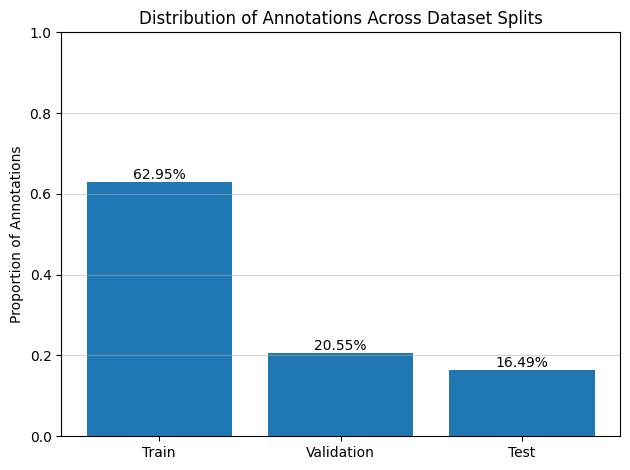

In [59]:
percentages = np.array([n_annotaions_train, n_annotaions_val, n_annotaions_test]) / tot_n_annotations

plt.bar(x=splits, height=percentages)

for i, perc in enumerate(percentages):
    plt.text(x=i, y=perc, s=f"{perc*100:.2f}%", ha="center", va="bottom")

plt.ylim((0, 1))
plt.title("Distribution of Annotations Across Dataset Splits")
plt.ylabel("Proportion of Annotations")
plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()

#### Distribution of annotations for individual videos

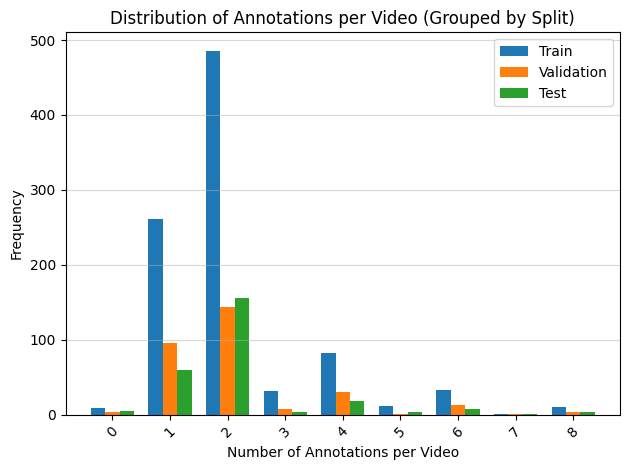

In [60]:
n_annotations_video_train = np.array([sum(len(clip["annotations"]) for clip in video["clips"]) for video in nlq_annotations_train["videos"]])
n_annotations_video_val = np.array([sum(len(clip["annotations"]) for clip in video["clips"]) for video in nlq_annotations_val["videos"]])
n_annotations_video_test = np.array([sum(len(clip["annotations"]) for clip in video["clips"]) for video in nlq_annotations_test["videos"]])


all_annotations = np.concatenate([n_clips_video_train, n_clips_video_val, n_clips_video_test])
bins = np.arange(min(all_annotations), max(all_annotations) + 3)  

train_hist, _ = np.histogram(n_annotations_video_train, bins=bins)
val_hist, _ = np.histogram(n_annotations_video_val, bins=bins)
test_hist, _ = np.histogram(n_annotations_video_test, bins=bins)

bar_width = 0.25
x = bins[:-1]  
x_indices = np.arange(len(x))  

plt.bar(x_indices - bar_width, train_hist, width=bar_width, label='Train')
plt.bar(x_indices, val_hist, width=bar_width, label='Validation')
plt.bar(x_indices + bar_width, test_hist, width=bar_width, label='Test')

plt.xticks(x_indices, x, rotation=45)
plt.xlabel("Number of Annotations per Video")
plt.ylabel("Frequency")
plt.title("Distribution of Annotations per Video (Grouped by Split)")
plt.legend()
plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()

In [61]:
print("Number of videos with 0 annotations per split:")
print(f"  Train:      {np.sum(n_annotations_video_train == 0)}")
print(f"  Validation: {np.sum(n_annotations_video_val == 0)}")
print(f"  Test:       {np.sum(n_annotations_video_train == 0)}")

Number of videos with 0 annotations per split:
  Train:      9
  Validation: 3
  Test:       9


It is obvius that since some videos have zero clips, then the same number of videos will have zero annotations

#### Distribution of annotations for individual clips

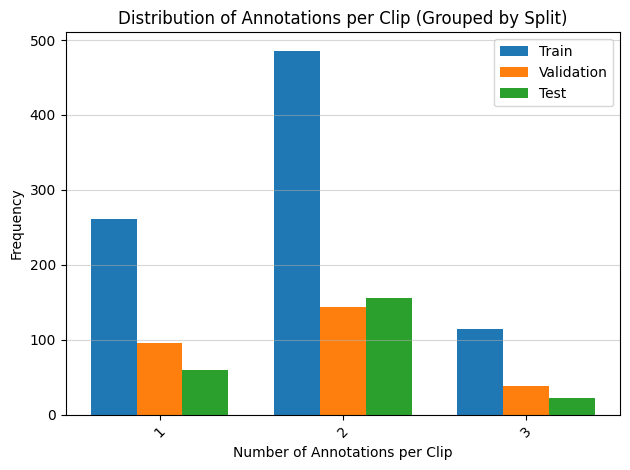

In [62]:
n_annotations_clip_train = np.array([len(clip["annotations"]) for video in nlq_annotations_train["videos"] for clip in video["clips"]])
n_annotations_clip_val = np.array([len(clip["annotations"]) for video in nlq_annotations_val["videos"] for clip in video["clips"]])
n_annotations_clip_test = np.array([len(clip["annotations"]) for video in nlq_annotations_test["videos"] for clip in video["clips"]])

all_annotations = np.concatenate([n_annotations_clip_train, n_annotations_clip_val, n_annotations_clip_test])
bins = np.arange(min(all_annotations), max(all_annotations) + 3) 

train_hist, _ = np.histogram(n_annotations_video_train, bins=bins)
val_hist, _ = np.histogram(n_annotations_video_val, bins=bins)
test_hist, _ = np.histogram(n_annotations_video_test, bins=bins)

bar_width = 0.25
x = bins[:-1]  
x_indices = np.arange(len(x))  

plt.bar(x_indices - bar_width, train_hist, width=bar_width, label='Train')
plt.bar(x_indices, val_hist, width=bar_width, label='Validation')
plt.bar(x_indices + bar_width, test_hist, width=bar_width, label='Test')

plt.xticks(x_indices, x, rotation=45)
plt.xlabel("Number of Annotations per Clip")
plt.ylabel("Frequency")
plt.title("Distribution of Annotations per Clip (Grouped by Split)")
plt.legend()
plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()

In [63]:
# Count language queries per split (Train, Validation, Test)
n_language_queries_train_split = np.sum([
    sum(len(annotation["language_queries"]) for annotation in clip["annotations"])
    for video in nlq_annotations_train["videos"]
    for clip in video["clips"]
])

n_language_queries_val_split = np.sum([
    sum(len(annotation["language_queries"]) for annotation in clip["annotations"])
    for video in nlq_annotations_val["videos"]
    for clip in video["clips"]
])

n_language_queries_test_split = np.sum([
    sum(len(annotation["language_queries"]) for annotation in clip["annotations"])
    for video in nlq_annotations_test["videos"]
    for clip in video["clips"]
])

tot_language_queries = n_language_queries_train_split + n_language_queries_val_split + n_language_queries_test_split


print(f"Number of Annotations per Split (Total: {tot_language_queries}):")
print(f"  - Train:      {n_language_queries_train_split}")
print(f"  - Validation: {n_language_queries_val_split}")
print(f"  - Test:       {n_language_queries_test_split}")

Number of Annotations per Split (Total: 22408):
  - Train:      13849
  - Validation: 4554
  - Test:       4005


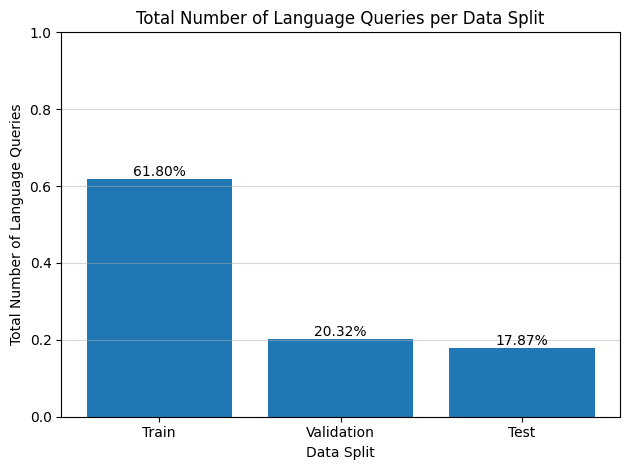

In [64]:
percentages = np.array([n_language_queries_train_split, n_language_queries_val_split, n_language_queries_test_split]) / tot_language_queries

plt.bar(splits, percentages)

for i, perc in enumerate(percentages):
    plt.text(x=i, y=perc, s=f"{perc*100:.2f}%", ha="center", va="bottom")

plt.ylim((0, 1))
plt.xlabel("Data Split")
plt.ylabel("Total Number of Language Queries")
plt.title("Total Number of Language Queries per Data Split")
plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()

#### Templates distribution

In [65]:
templates_train = np.array([
    language_query["template"]
    for video in nlq_annotations_train["videos"]
    if video["clips"]
    for clip in video["clips"]
    for annotation in clip["annotations"]
    for language_query in annotation["language_queries"]
    if language_query.get("template") is not None and len(language_query["template"]) != 0  # Ensure template is not None or empty
])

templates_val = np.array([
    language_query["template"]
    for video in nlq_annotations_val["videos"]
    if video["clips"]
    for clip in video["clips"]
    for annotation in clip["annotations"]
    for language_query in annotation["language_queries"]
    if language_query.get("template") is not None and len(language_query["template"]) != 0  # Ensure template is not None or empty
])

In [86]:
template_categories_train = np.array([template.split(":")[0] for template in templates_train])
template_categories_val = np.array([template.split(":")[0] for template in templates_val])

unique_categories_train, counts_train = np.unique(template_categories_train, return_counts=1)  
unique_categories_val, counts_val = np.unique(template_categories_val, return_counts=1)  

total_train = sum(counts_train)
total_val = sum(counts_val)

print("\nTraining Set Categories:")
print("-" * 50)
print(f"{'Category':<20} {'Count':<10} {'Percentage':<10}")
print("-" * 50)
for category, count in zip(unique_categories_train, counts_train):
    percentage = (count / total_train) * 100
    print(f"{category:<20} {count:<10} {percentage:.2f}%")
print("-" * 50)
print(f"{'TOTAL':<20} {total_train:<10}")
print("-" * 50)

print("\nValidation Set Categories:")
print("-" * 50)
print(f"{'Category':<20} {'Count':<10} {'Percentage':<10}")
print("-" * 50)
for category, count in zip(unique_categories_val, counts_val):
    percentage = (count / total_val) * 100
    print(f"{category:<20} {count:<10} {percentage:.2f}%")
print("-" * 50)
print(f"{'TOTAL':<20} {total_val:<10}")
print("-" * 50)


Training Set Categories:
--------------------------------------------------
Category             Count      Percentage
--------------------------------------------------
Objects              11071      80.34%
People               721        5.23%
Place                1989       14.43%
--------------------------------------------------
TOTAL                13781     
--------------------------------------------------

Validation Set Categories:
--------------------------------------------------
Category             Count      Percentage
--------------------------------------------------
Objects              3583       78.99%
People               228        5.03%
Place                725        15.98%
--------------------------------------------------
TOTAL                4536      
--------------------------------------------------


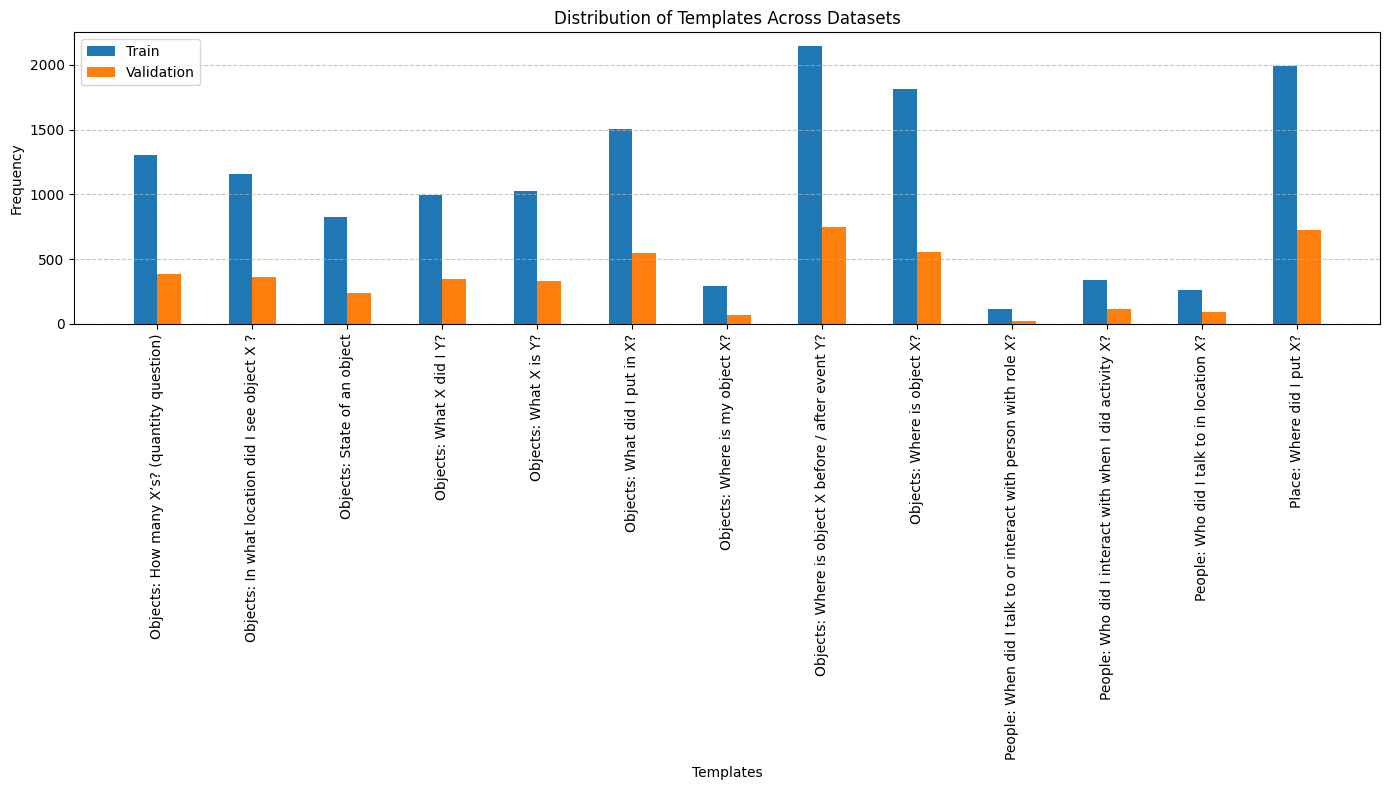

In [109]:
train_unique_templates, train_counts = np.unique(templates_train, return_counts=True)
val_unique_templates, val_counts = np.unique(templates_val, return_counts=True)

all_templates = np.unique(np.concatenate([train_unique_templates, 
                                         val_unique_templates, ]))

train_dict = dict(zip(train_unique_templates, train_counts))
val_dict = dict(zip(val_unique_templates, val_counts))

fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(all_templates))
width = 0.25

train_values = [train_dict.get(t, 0) for t in all_templates]
val_values = [val_dict.get(t, 0) for t in all_templates]

bars1 = ax.bar(x - width / 2, train_values, width, label='Train')  
bars2 = ax.bar(x + width / 2, val_values, width, label='Validation')       

ax.set_xlabel('Templates')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Templates Across Datasets')
ax.set_xticks(x)
ax.set_xticklabels(all_templates, rotation=90)
ax.legend()
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Annotated clips duration distribution

In [98]:
clips_start_sec_train = np.array([
    language_query["clip_start_sec"]
    for video in nlq_annotations_train["videos"]
    if video["clips"]
    for clip in video["clips"]
    for annotation in clip["annotations"]
    for language_query in annotation["language_queries"]
    if language_query.get("template") is not None and len(language_query["template"]) != 0  # Ensure template is not None or empty
])

clips_end_sec_train = np.array([
    language_query["clip_end_sec"]
    for video in nlq_annotations_train["videos"]
    if video["clips"]
    for clip in video["clips"]
    for annotation in clip["annotations"]
    for language_query in annotation["language_queries"]
    if language_query.get("template") is not None and len(language_query["template"]) != 0  # Ensure template is not None or empty
])

clips_start_sec_val = np.array([
    language_query["clip_start_sec"]
    for video in nlq_annotations_val["videos"]
    if video["clips"]
    for clip in video["clips"]
    for annotation in clip["annotations"]
    for language_query in annotation["language_queries"]
    if language_query.get("template") is not None and len(language_query["template"]) != 0  # Ensure template is not None or empty
])

clips_end_sec_val = np.array([
    language_query["clip_end_sec"]
    for video in nlq_annotations_val["videos"]
    if video["clips"]
    for clip in video["clips"]
    for annotation in clip["annotations"]
    for language_query in annotation["language_queries"]
    if language_query.get("template") is not None and len(language_query["template"]) != 0  # Ensure template is not None or empty
])

In [101]:
clip_duration_train = clips_end_sec_train - clips_start_sec_train
clip_duration_val = clips_end_sec_val - clips_start_sec_val

print("Clip Duration Statistics:")
print("--------------------------")
print(f"Train Set - Min: {clip_duration_train.min():.2f}s | Max: {clip_duration_train.max():.2f}s | Mean: {clip_duration_train.mean():.2f}s")
print(f"Val Set   - Min: {clip_duration_val.min():.2f}s | Max: {clip_duration_val.max():.2f}s | Mean: {clip_duration_val.mean():.2f}s")

Clip Duration Statistics:
--------------------------
Train Set - Min: 0.13s | Max: 480.00s | Mean: 11.30s
Val Set   - Min: 0.14s | Max: 477.63s | Mean: 10.76s


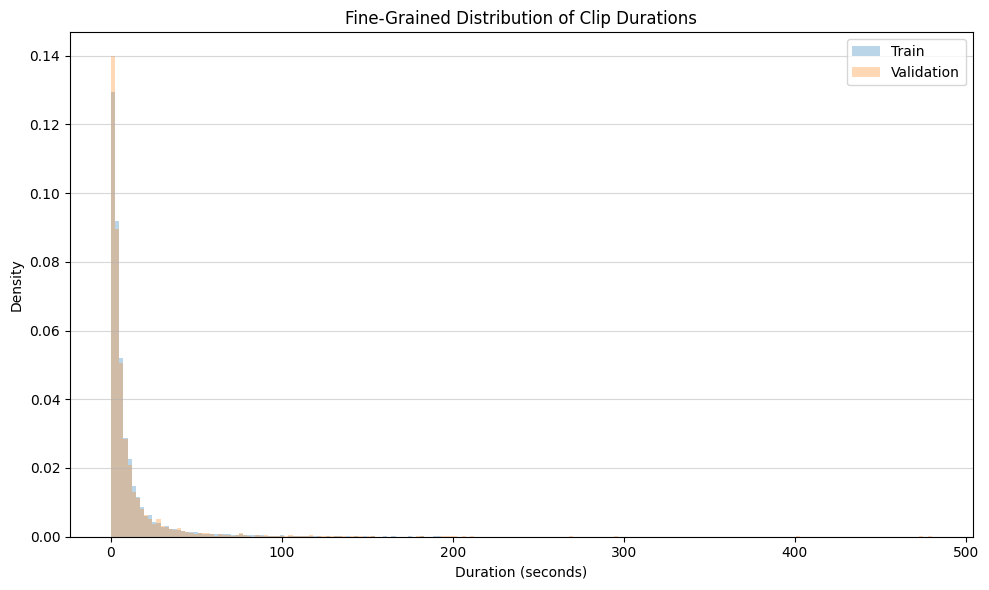

In [113]:
min_val = min(clip_duration_train.min(), clip_duration_val.min())
max_val = max(clip_duration_train.max(), clip_duration_val.max())
bins = np.linspace(min_val, max_val, 200)  # 200 fine-grained bins

plt.figure(figsize=(10, 6))
plt.hist(clip_duration_train, bins=bins, alpha=0.3, label='Train', density=True)
plt.hist(clip_duration_val, bins=bins, alpha=0.3, label='Validation', density=True)

plt.title('Fine-Grained Distribution of Clip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()

## Omnivore

In [ ]:
OMNIVORE_DATA_PATH = os.path.join(EGO4D_DATA_PATH, "omnivore_video_swinl_fp16")

# EgoVLP Data

In [ ]:
EGOVLP_DATA = os.path.join("egovlp_data")